# Black Friday Data Set EDA and Feature Engineering

## Cleaning and preparing the data for model training

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Problem Statement: 

* A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

* Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
# Loading data sets.

df_train = pd.read_csv('D:\\Study\\Data Science and Machine Learning\\Krish Naik\\Live EDA\\Black Friday Data Set\\train.csv')
df_test = pd.read_csv('D:\\Study\\Data Science and Machine Learning\\Krish Naik\\Live EDA\\Black Friday Data Set\\test.csv')

In [3]:
# Checking top 5 rows of the train data set.

df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Checking the shape of the train data set.

df_train.shape

(550068, 12)

In [5]:
# Checking top 5 rows of the test data set.

df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
# Checking the shape of the test data set.

df_test.shape

(233599, 11)

In [7]:
# Merging both train and test dataset.

df = df_train.append(df_test)
df.head()

C:\Users\Shivam Dwivedi\AppData\Local\Temp\ipykernel_6864\2326007942.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
# Checking the shape of the final dataset after merging.

df.shape

(783667, 12)

In [9]:
# Checking info of the data set.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [10]:
# Checking the statistical description of the data set.

df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
# Dropping the unwanted column 'User ID'

df.drop('User_ID',axis=1,inplace=True)

In [12]:
# Checking the top 5 rows of the data frame again.

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
# Encoding 'Gender' column using map function.

df['Gender'] = df['Gender'].map({'F':0,'M':1})
df.head()

# Another way of encoding categorical column is by using pd.get_dummies

# df['Gender'] = pd.get_dummies(df['Gender'],drop_first=1)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
# Handling categorical feature 'Age'. 
# First checking the unique values of 'Age'.

df['Age'].unique()



array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
# To encode 'Age' Column we'll use targted ordinal encoding technique using map function or we can do label encoding using preprocessing.LabelEncoder from sklearn.
# We'll not use dummy encoding because it is not a good practice for such data sets where age plays important role.

## First Technique
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

## Second Technique

# from sklearn import preprocessing

# label_encoder = preprocessing.LabelEncoder()

# df['Age'] = label_encoder.fit_transform(df['Age'])

# df['Age'].unique()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [16]:
# Handling City_category column by using pd.get_dummies.

df_city = pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [17]:
# Merging the df_city in the original data frame 'df'.

df = pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [18]:
# Dropping the city_category feature.

df.drop('City_Category',axis=1,inplace=True)

In [19]:
# Checking the missing values.

df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [20]:
# Now Focusing on replacing the missing values of 'Product_Category_2' and 'Product_Category_3' but we'll not replace null of 'Purchase' because those null values are for test data.

# Let's check the unique values of 'Product_Category_2'.

df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
# Checking the mode of 'Product_Category_2'

df['Product_Category_2'].mode()[0]

8.0

In [22]:
# Since the unique values of 'Product_Category_2' are of discrete or categorical nature, therefore we'll replace the null values with mode using fillna function.

df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [23]:
# Again checking the nullvalues count of 'Product_Category_2' to verify.

df['Product_Category_2'].isnull().sum()

0

In [24]:
# Similarly replacing the null values for 'Product_Category_3'. 

# First checking the unique values and then finding mode, because we'll replace the null values with mode.

print('Unique_Values:', df['Product_Category_3'].unique())
print('\n')
print('Mode:', df['Product_Category_3'].mode()[0])

Unique_Values: [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


Mode: 16.0


In [25]:
# Replacing the null values of 'Product_Category_3' using fillna function with it's mode.

df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [26]:
# Checking the null values count of the 'Product_Category_3' again.

df['Product_Category_3'].isnull().sum()

0

In [27]:
# Handling the column 'Stay_In_Current_City_Years'

# First Checking the unique counts of 'Stay_In_Current_City_Years'.

print('Unique:', df['Stay_In_Current_City_Years'].unique())


df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','') 

Unique: ['2' '4+' '3' '1' '0']


C:\Users\Shivam Dwivedi\AppData\Local\Temp\ipykernel_6864\2411869291.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')


In [28]:
# Checking the top 5 rows of the data set.

df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [29]:
# Checking the data info again.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [30]:
# Convert the data type of some columns.

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['B'] = df['B'].astype(int)
df['C'] = df['B'].astype(int)

In [31]:
# Checking again the info of the data set.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

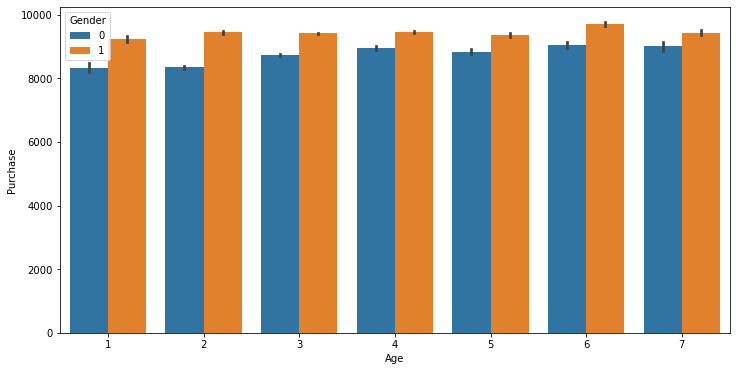

In [49]:
# Checking visualisation Age Vs Purchase

import matplotlib
matplotlib.rcParams['figure.figsize']= (12,6)

sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

In [33]:
# Checking the value counts of Gender where 0 is female and 1 is male.

df['Gender'].value_counts()

1    590031
0    193636
Name: Gender, dtype: int64

In [38]:
# Checking the value counts of different Occupation.

df['Occupation'].value_counts()

4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

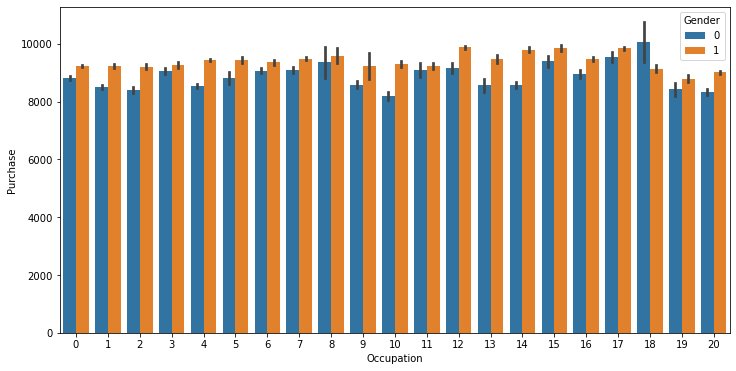

In [50]:
# Checking the visualisation of Occupation with Purchase.

sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

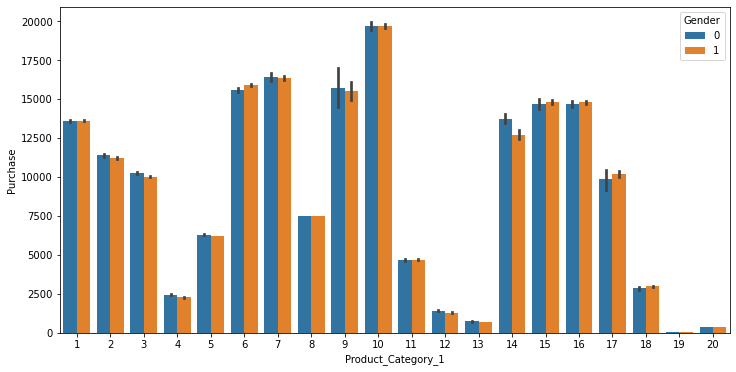

In [51]:
# Checking the visualisation of Product_Category_1 with Purchase, gender vice where 0 is female and 1 is male.

sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

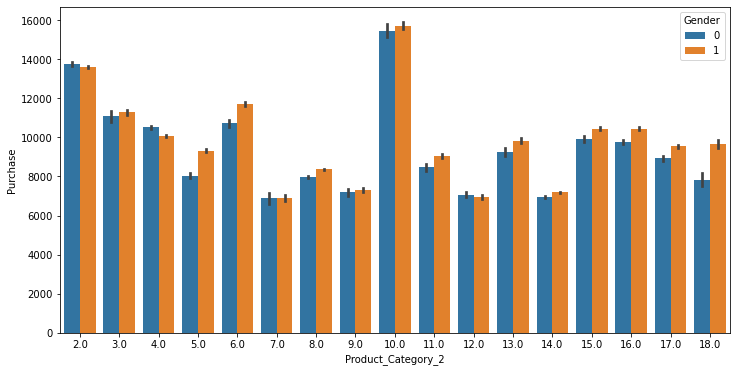

In [52]:
# Checking the visualisation of Product_Category_2 with Purchase, gender vice where 0 is female and 1 is male.

sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

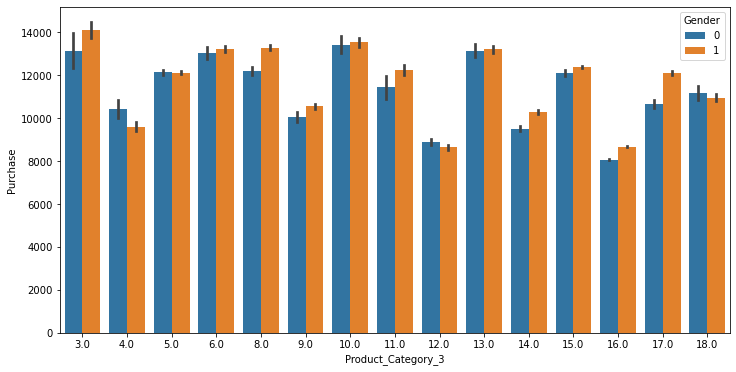

In [53]:
# Checking the visualisation of Product_Category_3 with Purchase, gender vice where 0 is female and 1 is male.

sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

In [60]:
# Assigning values to df_test and df_train.

df_test = df[df['Purchase'].isnull()]
df_test = df_test.drop('Product_ID',axis=1)

df_train = df[~df['Purchase'].isnull()]
df_train = df_train.drop('Product_ID',axis=1)

In [62]:
# Assigning values to X

X = df_train.drop('Purchase',axis=1)

In [63]:
# Checking top 5 rows of X.

X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,0


In [64]:
# Checking shape of X.

X.shape

(550068, 10)

In [65]:
# Assigning value to y.

y = df_train['Purchase']

In [66]:
# Checking shape of y.

y.shape

(550068,)

In [68]:
# Splitting into train and test.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [69]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [70]:
## ready to build models.